In [ ]:
#!pip install geopandas

In [ ]:
#!conda install rtree

In [ ]:
#!pip install osmnx

In [301]:
#Run Locally
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import rtree
import osmnx
import shapely
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from fiona.crs import from_epsg
import shapely
%matplotlib inline
#from google.colab import drive

#drive.mount('/content/drive/')

# Sidewalk + sdwkothrs

In [368]:
#os.listdir('/content/drive/My Drive/Getting to Zero Capstone /Data') #google drive
os.listdir()


['joined_plazasq.csv',
 'joined_beach.csv',
 'Data Augmentation and Preprocessing objectives.docx',
 'CEA-33.pdf',
 'joined_pubgardn.csv',
 'Quantitative Theoretical and Conceptual Framework Use in Agricultural Education Research.pdf',
 'joined_sidewalk+othrsdwk.csv',
 '.DS_Store',
 'Deliverable 2.docx',
 'USI_II_Summer_2019_syllabus_V05_15_19.pdf',
 'Untitled.ipynb',
 'ToWalkOrNotToWalk.pdf',
 'Shapefiles',
 '04oct-Article-AET.pdf',
 'joined_planimetric.csv',
 'Data_planimetrics.ipynb',
 'NYUSampleHotspotsVsControlProcessedData20190625.xlsx',
 'joined_playsprt_swimpool.csv',
 'joined_driveway.csv',
 'NYU_capstone_VML',
 'joined_median.csv',
 'joined_parkplay.csv',
 'joined_playsprt_baseball.csv',
 'segs_275.csv',
 'joined_playsprt_football.csv',
 'Variable analysis-Robin.ipynb',
 'citiessaferbydesign_final.pdf',
 'joined_parkinglot_2000.csv',
 '.ipynb_checkpoints',
 'googleapi.py',
 'safe_streets_--_green_cities-_good_health.pdf',
 'joined_pbspothr.csv',
 'data',
 'joined_abndbldg.csv

In [303]:
#Change Path before reproduce
#path1 = '/content/drive/My Drive/Getting to Zero Capstone /Data/planimetric/Shapefiles' # google path to dataset requiring merged
#path2 = '/content/drive/My Drive/Getting to Zero Capstone /Data/dataJoin/sampleArea' # google path to main dataset

path1 = 'Shapefiles/Sidewalk.shp' # path to dataset requiring merged
path2 = 'data/road_network_data/osm/osm_w_collisions/edges/edges.shp'# path to sample area
path3 = 'data/road_network_data/osm/osm_w_collisions/nodes/nodes.shp'

segs = gpd.read_file(path2).to_crs({'init': 'epsg:2263'})
#segs.crs = {'init': 'epsg:2263'}
#segs = segs.to_crs({'init': 'epsg:2263'})
nodes = gpd.read_file(path3).to_crs({'init': 'epsg:2263'})


In [304]:

segs.head(1)

,access,bridge,from,highway,junction,key,lanes,length,maxspeed,name,...,FIRST_Traf,MAX_Number,MAX_Numb_1,MAX_Numb_2,MAX_POSTED,FIRST_Bike,FIRST_Stre,MAX_Street,MIN_Street,geometry
0,None,None,42817478,residential,None,0,None,81.315,20 mph,47th Avenue,...,T,2,2,4,25,3,47 AVENUE,45.0,45.0,LINESTRING (1001015.644995337 210168.626706699...


In [ ]:
#nodes.head(1)

In [6]:
segs.columns

Index(['access', 'bridge', 'from', 'highway', 'junction', 'key', 'lanes',
       'length', 'maxspeed', 'name', 'oneway', 'osmid', 'ref', 'service', 'to',
       'tunnel', 'width', 'id', 'LBlockFace', 'RBlockFace', 'FIRST_Traf',
       'MAX_Number', 'MAX_Numb_1', 'MAX_Numb_2', 'MAX_POSTED', 'FIRST_Bike',
       'FIRST_Stre', 'MAX_Street', 'MIN_Street', 'geometry'],
      dtype='object')

In [7]:
segs = segs[['id','geometry']]
segs

,id,geometry
0,1,LINESTRING (1001015.644995337 210168.626706699...
1,2,LINESTRING (1000385.279703911 210279.867242070...
2,3,LINESTRING (1000555.397690829 209732.936517981...
3,4,LINESTRING (1000788.20476476 210489.0828251308...
4,5,LINESTRING (1002699.169230139 177417.034729413...
5,6,LINESTRING (1002615.212700135 178435.923287202...
6,7,LINESTRING (1002921.868557177 177996.413173496...
7,8,"LINESTRING (1002383.892641102 177952.28650031,..."
8,9,LINESTRING (1003181.006567429 178017.380318647...
9,10,LINESTRING (1002921.868557177 177996.413173496...


In [9]:
#test one
sidewalks = gpd.read_file(path1).to_crs({'init': 'epsg:2263'})
sidewalks.head(2)

,SOURCE_ID,FEATURE_CO,SUB_FEATUR,STATUS,geometry
0,2.138000e+10,3800,380000,Unchanged,"POLYGON ((984808.2226250023 190837.1944909841,..."
1,2.138000e+10,3800,380000,Unchanged,"POLYGON ((985043.92556566 190997.1377406418, 9..."


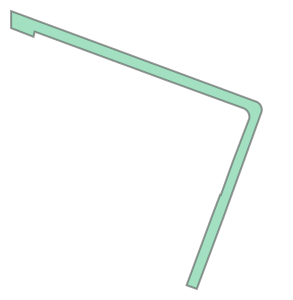

In [10]:
# draw one sidewalk
sidewalks.iloc[1,4]

In [11]:
sidewalks.columns

Index(['SOURCE_ID', 'FEATURE_CO', 'SUB_FEATUR', 'STATUS', 'geometry'], dtype='object')

In [143]:
segs_buff = segs.copy()
segs_buff['geometry'] = segs_buff.geometry.buffer(120, cap_style=2)

#each segment can have multiple pavement

In [144]:
#draw sidewalk with the mideast area
sidewalks_tmp = gpd.sjoin(sidewalks, segs_buff, how  = 'left')
sidewalks_tmp = sidewalks_tmp[sidewalks_tmp['index_right'] >= 0]

In [145]:
sidewalks_tmp.head()

,SOURCE_ID,FEATURE_CO,SUB_FEATUR,STATUS,geometry,index_right,id
0,2.138000e+10,3800,380000,Unchanged,"POLYGON ((984808.2226250023 190837.1944909841,...",24344.0,24345.0
0,2.138000e+10,3800,380000,Unchanged,"POLYGON ((984808.2226250023 190837.1944909841,...",24337.0,24338.0
0,2.138000e+10,3800,380000,Unchanged,"POLYGON ((984808.2226250023 190837.1944909841,...",24336.0,24337.0
0,2.138000e+10,3800,380000,Unchanged,"POLYGON ((984808.2226250023 190837.1944909841,...",43726.0,43727.0
0,2.138000e+10,3800,380000,Unchanged,"POLYGON ((984808.2226250023 190837.1944909841,...",43888.0,43889.0


(971242.5321470357, 1001368.7415797788, 148006.5231906999, 191994.66504222757)

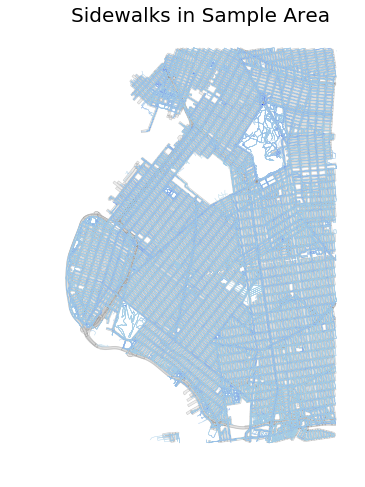

In [214]:
#plot sidewalk with segment buffer
from shapely.geometry import Point, box


fig, ax = plt.subplots(figsize=(12,8))
minx, miny, maxx, maxy = (970000, 150000, 1000000, 190000)
sample_bounds = box(minx, miny, maxx, maxy)
segs_b = segs_buff[segs_buff.within(sample_bounds)]
segs_joined_sample = sidewalks_tmp[sidewalks_tmp.within(sample_bounds)]


ax.set_title('Sidewalks in Sample Area', fontsize=20)
segs_b.plot(edgecolor='grey', facecolor='lightgrey', ax= ax, lw=0.5, zorder=-1, alpha=0.4)
segs_joined_sample.plot(edgecolor='lightblue', facecolor='blue', ax= ax, lw=0.5, zorder=-1, alpha=0.4)

ax.axis('off')

In [146]:
#This is helpful when a single columns translates to multiple SoP variables
sidewalks_tmp = sidewalks_tmp[['SUB_FEATUR','geometry','id']].reset_index(level=0, drop=True)

In [147]:
sidewalks_tmp.head()

,SUB_FEATUR,geometry,id
0,380000,"POLYGON ((984808.2226250023 190837.1944909841,...",24345.0
1,380000,"POLYGON ((984808.2226250023 190837.1944909841,...",24338.0
2,380000,"POLYGON ((984808.2226250023 190837.1944909841,...",24337.0
3,380000,"POLYGON ((984808.2226250023 190837.1944909841,...",43727.0
4,380000,"POLYGON ((984808.2226250023 190837.1944909841,...",43889.0


In [148]:
sidewalks_tmp[sidewalks_tmp.id ==24338.0]
#Each id may have multiple records

,SUB_FEATUR,geometry,id
1,380000,"POLYGON ((984808.2226250023 190837.1944909841,...",24338.0
206016,380000,"POLYGON ((984680.6648092419 190617.8816093951,...",24338.0
210525,380010,"POLYGON ((984762.9884634912 190878.7636335641,...",24338.0


In [149]:
sidewalks_tmp.SUB_FEATUR.value_counts()

380000    228412
380010     16233
Name: SUB_FEATUR, dtype: int64

In [150]:
# According to the github READMe explanation: 380000 == sidewalk,380010 = interior sidewalk
transform_dict = {380000:'sidewalk',
                  380010:'othrsdwk'}


sidewalks_raw = pd.get_dummies(sidewalks_tmp['SUB_FEATUR']).rename(columns = transform_dict)
print(sidewalks_raw.shape)
sidewalks_raw.head()

(244645, 2)


,sidewalk,othrsdwk
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [156]:
sidewalk_nyc = pd.merge(sidewalks_tmp[['id']],sidewalks_raw,left_index=True, right_index= True).groupby('id').sum()\
                .reset_index(level=0, drop=False)


sidewalk_nyc.sidewalk.value_counts()
#sidewalk_nyc.head()

2      50184
3      19561
4       8926
1       5092
5       2604
6        916
0        384
7        354
8        196
9        118
10        60
11        45
12        45
13        31
14        19
15        18
16        14
18        11
17        11
25         8
21         6
20         5
19         5
23         5
28         5
24         3
30         2
37         2
35         2
32         2
31         2
27         2
26         2
22         2
61         1
40         1
44         1
47         1
55         1
120        1
63         1
Name: sidewalk, dtype: int64

In [160]:
sidewalk_nyc.rename(columns = {'id':'segid'},inplace =True)
sidewalk_nyc.head()

,segid,sidewalk,othrsdwk
0,1.0,2,0
1,2.0,3,0
2,3.0,4,0
3,4.0,3,0
4,5.0,2,0


### 1. Sidewalk number >2 roughly means it contains both sides of sidewalk, since the original data of sidewalk is irregular polygon. The average width of Street is 60- 100 for Manhattan, here I take 120 feet as buffer. 

### 2. 384 street with 0 sidewalks. 5092 streets have 1 side of sidewalk.

### 3. Same for othrsdwk

In [161]:
#write the sidewalk
sidewalk_nyc.to_csv("joined_sidewalk+othrsdwk.csv",index=False,sep=',')

# Apply on other features -Median

In [19]:
for fc in os.listdir('Shapefiles'):
  if fc.endswith('.shp'):
    print(fc)

Elevated_railroad.shp
Water_Elevation.shp
Railroad_Retaining_Wall.shp
Bridge.shp
Interior_Sidewalk_Centerline.shp
Median.shp
Ventilation_grate.shp
Tunnel.shp
Railway_fence.shp
Greenstreets.shp
Building_Elevation.shp
Beach_Shoreline.shp
Pool.shp
Football_Field.shp
Baseball_Softball_Field.shp
Recreational_area__Not_NYC_designated_parks_.shp
Overpass.shp
Road_Edge.shp
Court.shp
Open_cut_depression_railroad.shp
Swimming_Pool.shp
Elevated_subway_train_station.shp
Shoreline.shp
River.shp
Pedestrian_Bridge.shp
Roadbed.shp
Plaza.shp
Sidewalk.shp
Embankment_railroad.shp
Airport_Runways.shp
Park_Boundary.shp
Railroad_Viaduct.shp
Toll_Area.shp
Pier.shp
Running_Track.shp
Railroad.shp
Viaduct_centerline.shp
Stream_wider_than_8_feet.shp
Cemetery_Outline.shp
Spot_Elevation.shp
Other_Retaining_Wall.shp
Vacant_Area_containing_no_structures.shp
Emergency_exit.shp
Parking_Lots___2000_Square_Feet.shp
Alley.shp
Transit_entrance.shp
Abandoned_railroad.shp
Boardwalk_along_beach.shp
Soccer_Field.shp
Wetland.s

#### Since median is on the road,  use GeoSeries.centroid find the central point  of polygon, and use Pablo's formular to find the nearest segment

In [163]:
# Since median is on the road,  use GeoSeries.centroid find the central point  of polygon, and use Pablo's formular to find the nearest segment
#test
fea_dataset = gpd.read_file('Shapefiles/Median.shp').to_crs({'init': 'epsg:2263'})
fea_dataset['centroid'] = fea_dataset['geometry'].centroid
fea_dataset.head()

,STREET_NAM,SOURCE_ID,FEATURE_CO,SUB_FEATUR,STATUS,geometry,centroid
0,None,2.136000e+10,3600,360010,Unchanged,"POLYGON ((990026.1469004154 191974.9441839755,...",POINT (989777.4015526662 192468.9281117312)
1,None,2.136000e+10,3600,360010,Unchanged,"POLYGON ((989996.1381021589 192081.6575532258,...",POINT (989826.1907925971 192405.7067205641)
2,None,2.136000e+10,3600,360010,Unchanged,"POLYGON ((989999.9999710768 191978.6649770588,...",POINT (989772.9321044827 192422.5431782209)
3,None,2.136000e+10,3600,360020,Unchanged,"POLYGON ((990005.4940545857 194189.9856856465,...",POINT (989992.8631637533 194193.6988815762)
4,None,2.136000e+10,3600,360020,Unchanged,"POLYGON ((990007.7463466674 194210.5381379873,...",POINT (989993.1740597539 194210.357510997)


In [164]:
index = rtree.Rtree()
for idx, geometry in enumerate(segs.geometry):
    index.insert(idx, geometry.bounds)

def closest_segment_id_rtree(point, index, segments):
    match = list(index.nearest((point.x, point.y, point.x, point.y)))
    if len(match):
        return segments.loc[segments.loc[match, 'geometry'].distance(point).idxmin(),'id']
    else:
        return None


In [370]:
def merge_feature(feature_file = 'Median.shp',df = segs,crs = '2263',sop_var_name = 'median'):
    '''feature is the file name;
    df is sample area;
    crs should be same with df crs;
    Plot the data;
    Return: 2 dataframe
            1st one includes all the detail about this feature
            2nd one includes sop variable column for writting to csv'''
    fea_dataset = gpd.read_file('Shapefiles/'+feature_file).to_crs({'init': 'epsg:'+crs})
    fea_dataset['centroid'] =  fea_dataset['geometry'].centroid
    fea_dataset['segid'] = fea_dataset.centroid.apply(lambda x: closest_segment_id_rtree(x, index, segs))
    #plot sample area
    fig, ax = plt.subplots(figsize=(12,8))
    minx, miny, maxx, maxy = (970000, 150000, 1000000, 190000)
    sample_bounds = box(minx, miny, maxx, maxy)
    segs_b = segs[segs.within(sample_bounds)]
    segs_joined_sample = fea_dataset[fea_dataset.within(sample_bounds)]


    ax.set_title(feature_file +' Sample Area', fontsize=20)
    segs_b.plot(edgecolor='grey', facecolor='lightgrey', ax= ax, lw=0.5, zorder=-1, alpha=0.4)
    segs_joined_sample.plot(edgecolor='lightblue', facecolor='blue', ax= ax, lw=0.5, zorder=-1, alpha=0.4)
    ax.axis('off')
    dt_to_csv = fea_dataset.groupby('segid').count().reset_index(level=0, drop=False)[['SUB_FEATUR','segid']]
    
    dt_to_csv.rename(columns = {'SUB_FEATUR':sop_var_name},inplace =True)
    return fea_dataset,dt_to_csv

,STREET_NAM,SOURCE_ID,FEATURE_CO,SUB_FEATUR,STATUS,geometry,centroid,segid
0,None,2.136000e+10,3600,360010,Unchanged,"POLYGON ((990026.1469004154 191974.9441839755,...",POINT (989777.4015526662 192468.9281117312),5335
1,None,2.136000e+10,3600,360010,Unchanged,"POLYGON ((989996.1381021589 192081.6575532258,...",POINT (989826.1907925971 192405.7067205641),5335
2,None,2.136000e+10,3600,360010,Unchanged,"POLYGON ((989999.9999710768 191978.6649770588,...",POINT (989772.9321044827 192422.5431782209),5335
3,None,2.136000e+10,3600,360020,Unchanged,"POLYGON ((990005.4940545857 194189.9856856465,...",POINT (989992.8631637533 194193.6988815762),2328
4,None,2.136000e+10,3600,360020,Unchanged,"POLYGON ((990007.7463466674 194210.5381379873,...",POINT (989993.1740597539 194210.357510997),2328


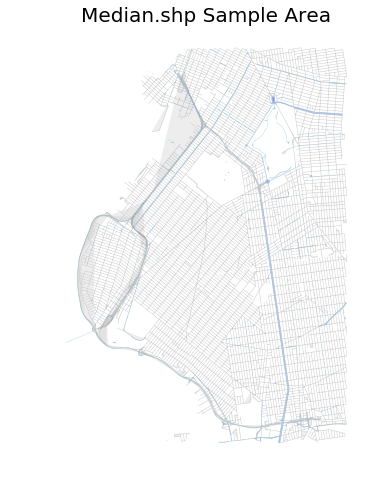

In [179]:
l, median = merge_feature()
l.head()

In [180]:
# check df to csv
median.head()

,median,segid
0,1,66
1,1,79
2,2,86
3,1,107
4,1,108


In [181]:
median.to_csv("joined_median.csv",index=False,sep=',')

# Apply on other features -Driveway
#### It's one of the feature in 'Roadbed.shp'

#### 350030: Driveway sub feature number

In [276]:
def merge_feature_driveway(feature_file = 'Median.shp',df = segs,crs = '2263',sop_var_name = 'median'):
    '''feature is the file name;
    df is sample area;
    crs should be same with df crs;
    Plot the data;
    Return: 2 dataframe
            1st one includes all the detail about this feature
            2nd one includes sop variable column for writting to csv'''
    fea_dataset = gpd.read_file('Shapefiles/'+feature_file).to_crs({'init': 'epsg:'+crs})
    #For Driveway
    fea_dataset = fea_dataset[fea_dataset.SUB_FEATUR == 350030]
    fea_dataset['centroid'] =  fea_dataset['geometry'].centroid
    fea_dataset['segid'] = fea_dataset.centroid.apply(lambda x: closest_segment_id_rtree(x, index, segs))
    #plot sample area
    fig, ax = plt.subplots(figsize=(12,8))
    minx, miny, maxx, maxy = (970000, 150000, 1000000, 190000)
    sample_bounds = box(minx, miny, maxx, maxy)
    segs_b = segs[segs.within(sample_bounds)]
    segs_joined_sample = fea_dataset[fea_dataset.within(sample_bounds)]


    ax.set_title(feature_file +' Sample Area', fontsize=20)
    segs_b.plot(edgecolor='grey', facecolor='lightgrey', ax= ax, lw=0.5, zorder=-1, alpha=0.4)
    segs_joined_sample.plot(edgecolor='lightblue', facecolor='blue', ax= ax, lw=0.5, zorder=-1, alpha=0.4)
    ax.axis('off')
    dt_to_csv = fea_dataset.groupby('segid').count().reset_index(level=0, drop=False)[['SUB_FEATUR','segid']]
    
    dt_to_csv.rename(columns = {'SUB_FEATUR':sop_var_name},inplace =True)
    return fea_dataset,dt_to_csv

,SOURCE_ID,FEATURE_CO,SUB_FEATUR,STATUS,geometry,centroid,segid
1662,7.350002e+09,3500,350030,Unchanged,"POLYGON ((1049301.216998324 200794.5479358137,...",POINT (1049262.266173546 200884.0402054937),43779
1759,7.350002e+09,3500,350030,Updated,"POLYGON ((1051111.518823907 203294.2745636404,...",POINT (1050939.691398016 203209.269928531),16407
1909,7.350002e+09,3500,350030,Updated,"POLYGON ((1050255.650128826 203423.2198438197,...",POINT (1050225.069298363 203437.6385297013),16408
2424,7.350002e+09,3500,350030,Updated,"POLYGON ((1051358.99306649 203145.0826048106, ...",POINT (1051336.598087572 203143.0590398201),74975
2436,7.350002e+09,3500,350030,Updated,"POLYGON ((1051511.668286085 203545.1864634007,...",POINT (1051544.487139861 203399.7559557433),74975


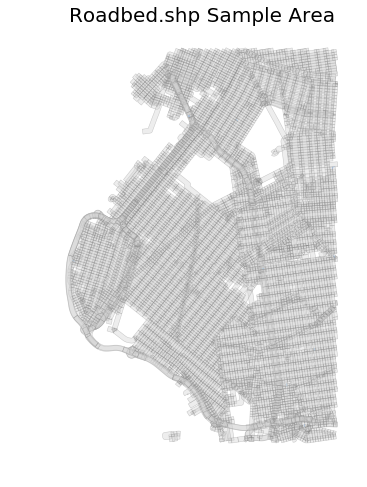

In [277]:
roadbed,roadbed_to_csv = merge_feature_driveway(feature_file = 'Roadbed.shp',df = segs,crs = '2263',sop_var_name = 'driveway')
roadbed.head()

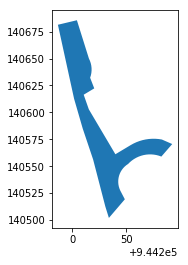

In [283]:

roadbed[roadbed.segid == 456].plot()

In [284]:
roadbed_to_csv.head()


,driveway,segid
0,1,207
1,1,456
2,1,660
3,2,775
4,2,861


In [285]:
roadbed_to_csv.describe()

,driveway,segid
count,350.000000,350.000000
mean,1.305714,48049.734286
std,0.753765,28147.952258
min,1.000000,207.000000
25%,1.000000,23396.500000
50%,1.000000,49938.000000
75%,1.000000,73569.500000
max,6.000000,91661.000000


In [286]:
roadbed_to_csv.driveway.value_counts()

1    281
2     45
3     17
6      3
4      3
5      1
Name: driveway, dtype: int64

In [287]:
roadbed_to_csv.driveway = roadbed_to_csv.driveway.apply(lambda x: 2 if x>=2 else x)
roadbed_to_csv.driveway.value_counts()

1    281
2     69
Name: driveway, dtype: int64

#### Cannot tell how many driveways, only classify to have driveway with "driveway"> 0 and no driveway with feature=0

In [288]:
roadbed_to_csv.to_csv("joined_driveway.csv",index=False,sep=',')

# Apply on other features -Parking lot_2000sqft (not travel-way)

,SOURCE_ID,FEATURE_CO,SUB_FEATUR,STATUS,geometry,centroid,segid
0,2.150000e+10,5000,500000,Unchanged,"POLYGON ((990044.4431236684 190843.5957248956,...",POINT (990029.3636842157 190739.7197202197),5339
1,2.150000e+10,5000,500000,Updated,"POLYGON ((989953.2139754146 191814.4684550613,...",POINT (989730.7282890398 191626.4517265979),5338
2,2.150000e+10,5000,500000,Unchanged,"POLYGON ((988897.051389575 195330.5549268126, ...",POINT (988847.3157554124 195306.7784605023),3452
3,2.150000e+10,5000,500000,Unchanged,"POLYGON ((989270.8839752525 195436.5458565652,...",POINT (989229.8061570526 195424.2433645794),3455
4,2.150000e+10,5000,500000,Unchanged,"POLYGON ((988145.6890471578 195152.533957392, ...",POINT (988214.4357064107 195019.9356224579),23148


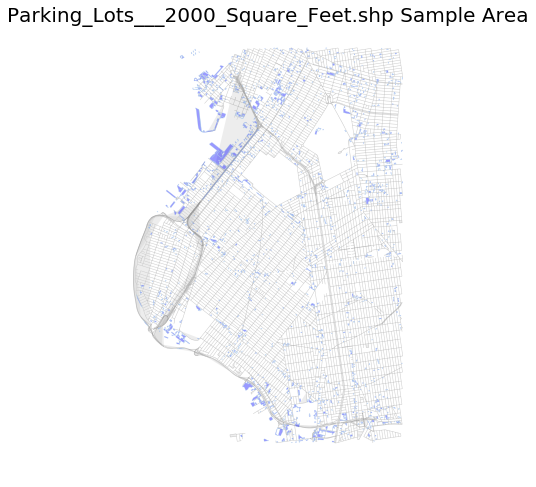

In [196]:
parkinglot, parkinglot_2000 = merge_feature(feature_file = 'Parking_Lots___2000_Square_Feet.shp',\
                                            df = segs,crs = '2263',sop_var_name = 'surfpkng')
parkinglot.head()

In [197]:
parkinglot_2000.head()

,surfpkng,segid
0,1,5
1,2,16
2,3,17
3,2,24
4,1,26


In [369]:
parkinglot_2000.to_csv("joined_parkinglot_2000.csv",index=False,sep=',')

In [308]:
os.listdir('Shapefiles/')

['Sidewalk.dbf',
 'Railway_fence.sbx',
 'Ventilation_grate.shx',
 'Median.shx',
 'Airport_Runways.prj',
 'Viaduct_centerline.sbn',
 'Elevated_railroad.shp',
 'Tunnel.sbx',
 'Embankment_railroad.dbf',
 'Parking_Lots___2000_Square_Feet.shp.xml',
 'Railroad_Viaduct.prj',
 'Park_Boundary.prj',
 'Stream_wider_than_8_feet.sbn',
 'Toll_Area.prj',
 'Lake_Reservoir.shp.xml',
 'Elevated_railroad.cpg',
 'Water_Elevation.shp',
 'Railroad.sbn',
 'Roadbed.dbf',
 'Railroad_Retaining_Wall.cpg',
 'Railroad_Retaining_Wall.shp',
 'Running_Track.prj',
 'Pier.prj',
 'Water_Elevation.cpg',
 'Alley.shp.xml',
 'Tunnel.shx',
 'Bridge.shp',
 'Interior_Sidewalk_Centerline.cpg',
 'Median.sbx',
 'Ventilation_grate.sbx',
 'Railway_fence.shx',
 'Interior_Sidewalk_Centerline.shp',
 'Plaza.dbf',
 'Bridge.cpg',
 'Toll_Area.shp.xml',
 'Median.shp',
 'Ventilation_grate.shp',
 'Interior_Sidewalk_Centerline.sbx',
 'River.dbf',
 'Railroad.prj',
 'Bridge.sbx',
 'Plaza.shp.xml',
 'Median.cpg',
 'Ventilation_grate.cpg',
 'Runn

In [325]:
def merge_feature_buffer(feature_file = 'Median.shp',df = segs, crs = '2263',sop_var_name = 'median'):
    '''feature is the file name;
    df is sample area;
    crs should be same with df crs;
    Plot the data;
    Return: 2 dataframe
            1st one includes all the detail about this feature
            2nd one includes sop variable column for writting to csv'''
    fea_dataset = gpd.read_file('Shapefiles/'+feature_file).to_crs({'init': 'epsg:'+crs})
    fea_dataset_copy = fea_dataset.copy()
    fea_dataset['geometry'] = fea_dataset.geometry.buffer(200, cap_style=2)
    
    #plot sample area
    fig, ax = plt.subplots(figsize=(12,8))
    minx, miny, maxx, maxy = (970000, 150000, 1000000, 190000)
    sample_bounds = box(minx, miny, maxx, maxy)
    segs_b = segs[segs.within(sample_bounds)]
    segs_joined_sample = fea_dataset[fea_dataset_copy.within(sample_bounds)]


    ax.set_title(feature_file +' Sample Area', fontsize=20)
    segs_b.plot(edgecolor='grey', facecolor='lightgrey', ax= ax, lw=0.5, zorder=-1, alpha=0.4)
    segs_joined_sample.plot(edgecolor='lightblue', facecolor='blue', ax= ax, lw=0.5, zorder=-1, alpha=0.4)
    ax.axis('off')
    
    
    fea_dataset = gpd.sjoin(fea_dataset, segs, how  = 'left')
    fea_dataset = fea_dataset[fea_dataset['id'] >= 0]
    dt_to_csv = fea_dataset.groupby('id').count().reset_index(level=0, drop=False)[['SUB_FEATUR','id']]
    dt_to_csv.rename(columns = {'SUB_FEATUR':sop_var_name,'id':'segid'},inplace =True)
    dt_to_csv[sop_var_name] = dt_to_csv[sop_var_name].apply(lambda x: 1 if x>0 else 0)
    return fea_dataset,dt_to_csv

# Apply on other features - Park

,PARK_NAME,SOURCE_ID,FEATURE_CO,SUB_FEATUR,LANDUSE,PARKNUM,STATUS,SYSTEM,geometry,index_right,...,RBlockFace,FIRST_Traf,MAX_Number,MAX_Numb_1,MAX_Numb_2,MAX_POSTED,FIRST_Bike,FIRST_Stre,MAX_Street,MIN_Street
0,Pierrepont Playground,2.149800e+10,4980,498000,Neighborhood Park,B222,Unchanged,None,"POLYGON ((984686.2699846938 193100.8228352284,...",81910.0,...,None,P,6,2,6,50,None,E 174 ST BR PED AND BIKE PATH,142.0,0.0
0,Pierrepont Playground,2.149800e+10,4980,498000,Neighborhood Park,B222,Unchanged,None,"POLYGON ((984686.2699846938 193100.8228352284,...",15258.0,...,0212260284,A,1,1,2,20,None,COLUMBIA HEIGHTS,22.0,22.0
0,Pierrepont Playground,2.149800e+10,4980,498000,Neighborhood Park,B222,Unchanged,None,"POLYGON ((984686.2699846938 193100.8228352284,...",36828.0,...,0212260008,A,3,None,3,45,None,BROOKLYN QUEENS EXPRESSWAY,34.0,18.0
0,Pierrepont Playground,2.149800e+10,4980,498000,Neighborhood Park,B222,Unchanged,None,"POLYGON ((984686.2699846938 193100.8228352284,...",14307.0,...,0212260285,W,1,2,3,20,None,MONTAGUE TERRACE,26.0,26.0
0,Pierrepont Playground,2.149800e+10,4980,498000,Neighborhood Park,B222,Unchanged,None,"POLYGON ((984686.2699846938 193100.8228352284,...",1309.0,...,0212260094,W,3,None,3,45,None,BROOKLYN QUEENS EXPRESSWAY,38.0,36.0


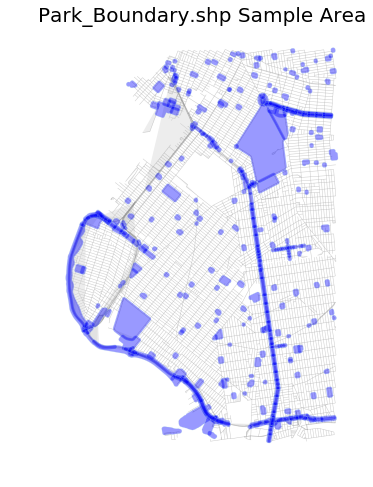

In [326]:
park, park_to_csv = merge_feature_buffer(feature_file = 'Park_Boundary.shp',\
                                            df = segs,crs = '2263',sop_var_name = 'parkplay')
park.head()

In [327]:
park_to_csv.describe()

,parkplay,segid
count,27127.0,27127.000000
mean,1.0,46313.783279
std,0.0,26459.426022
min,1.0,28.000000
25%,1.0,22662.500000
50%,1.0,47043.000000
75%,1.0,69592.500000
max,1.0,91649.000000


In [328]:
park_to_csv.to_csv("joined_parkplay.csv",index=False,sep=',')

# Apply on other features - Playing sport field

,PARK_NAME,SOURCE_ID,FEATURE_CO,SUB_FEATUR,LANDUSE,PARKNUM,STATUS,SYSTEM,geometry,index_right,...,RBlockFace,FIRST_Traf,MAX_Number,MAX_Numb_1,MAX_Numb_2,MAX_POSTED,FIRST_Bike,FIRST_Stre,MAX_Street,MIN_Street
0,M.S. 53,1.492000e+09,4920,492000,None,QS11,New,None,"POLYGON ((1053410.450951164 159493.9149079245,...",55451.0,...,0012263395,A,1,2,3,25,None,NAMEOKE STREET,26.0,26.0
0,M.S. 53,1.492000e+09,4920,492000,None,QS11,New,None,"POLYGON ((1053410.450951164 159493.9149079245,...",34978.0,...,0012263472,W,1,2,3,25,None,BEACH 18 STREET,30.0,28.0
0,M.S. 53,1.492000e+09,4920,492000,None,QS11,New,None,"POLYGON ((1053410.450951164 159493.9149079245,...",58453.0,...,0012262701,A,1,2,3,25,None,DINSMORE AVENUE,30.0,30.0
0,M.S. 53,1.492000e+09,4920,492000,None,QS11,New,None,"POLYGON ((1053410.450951164 159493.9149079245,...",58454.0,...,0012263413,A,1,2,3,25,None,BAYPORT PLACE,28.0,25.0
0,M.S. 53,1.492000e+09,4920,492000,None,QS11,New,None,"POLYGON ((1053410.450951164 159493.9149079245,...",58455.0,...,0012262700,A,1,2,3,25,None,NAMEOKE STREET,30.0,30.0


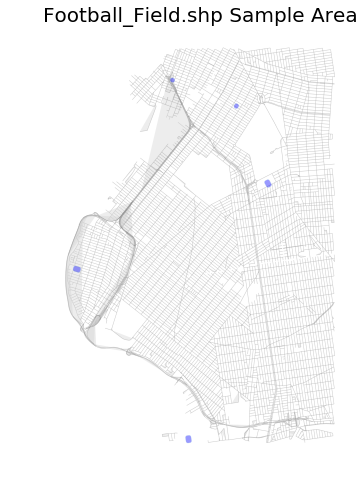

In [329]:
football, football_to_csv = merge_feature_buffer(feature_file = 'Football_Field.shp',\
                                            df = segs,crs = '2263',sop_var_name = 'playsprt_football')


football.head()

In [330]:

football_to_csv.describe()

,playsprt_football,segid
count,136.0,136.000000
mean,1.0,42702.088235
std,0.0,26194.227010
min,1.0,156.000000
25%,1.0,21214.750000
50%,1.0,41729.500000
75%,1.0,65670.500000
max,1.0,91462.000000


In [331]:
football_to_csv.to_csv("joined_playsprt_football.csv",index=False,sep=',')

,PARK_NAME,SOURCE_ID,FEATURE_CO,SUB_FEATUR,LANDUSE,PARKNUM,STATUS,SYSTEM,geometry,index_right,...,RBlockFace,FIRST_Traf,MAX_Number,MAX_Numb_1,MAX_Numb_2,MAX_POSTED,FIRST_Bike,FIRST_Stre,MAX_Street,MIN_Street
0,Commodore Barry Park,2.149000e+10,4900,490020,None,B021,Unchanged,B021-BASEBALL-151,"POLYGON ((989790.8778484941 193055.2582125658,...",73872.0,...,0212260765,T,2,1,3,25,2,NAVY STREET,54.0,40.0
0,Commodore Barry Park,2.149000e+10,4900,490020,None,B021,Unchanged,B021-BASEBALL-151,"POLYGON ((989790.8778484941 193055.2582125658,...",73847.0,...,0212260008,A,3,None,3,45,None,BROOKLYN QUEENS EXPRESSWAY,36.0,30.0
0,Commodore Barry Park,2.149000e+10,4900,490020,None,B021,Unchanged,B021-BASEBALL-151,"POLYGON ((989790.8778484941 193055.2582125658,...",21213.0,...,0212260765,T,2,1,3,25,2,NAVY STREET,54.0,40.0
0,Commodore Barry Park,2.149000e+10,4900,490020,None,B021,Unchanged,B021-BASEBALL-151,"POLYGON ((989790.8778484941 193055.2582125658,...",21214.0,...,0212262224,W,1,2,3,25,None,CONCORD STREET,30.0,28.0
0,Commodore Barry Park,2.149000e+10,4900,490020,None,B021,Unchanged,B021-BASEBALL-151,"POLYGON ((989790.8778484941 193055.2582125658,...",21204.0,...,0212261016,T,3,2,5,25,2,NAVY STREET,68.0,54.0


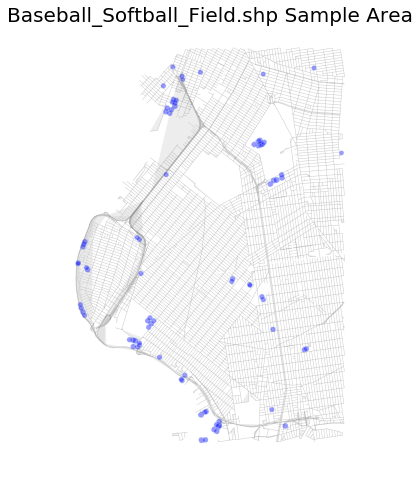

In [332]:
baseballfield, baseballfield_to_csv = merge_feature_buffer(feature_file = 'Baseball_Softball_Field.shp',\
                                            df = segs,crs = '2263',sop_var_name = 'playsprt_baseball')


baseballfield.head()

In [333]:
baseballfield_to_csv.describe()

,playsprt_baseball,segid
count,1730.0,1730.000000
mean,1.0,44954.261850
std,0.0,26055.827547
min,1.0,156.000000
25%,1.0,22766.500000
50%,1.0,44798.500000
75%,1.0,67734.750000
max,1.0,91331.000000


In [334]:
baseballfield_to_csv.to_csv("joined_playsprt_baseball.csv",index=False,sep=',')

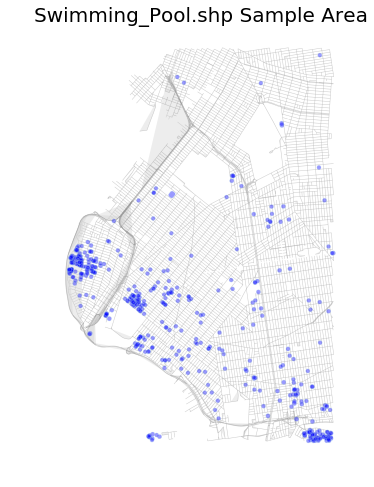

In [335]:
#swim
swim, swim_to_csv = merge_feature_buffer(feature_file = 'Swimming_Pool.shp',\
                                            df = segs,crs = '2263',sop_var_name = 'playsprt_swim')






In [337]:
swim_to_csv.describe()

,playsprt_swim,segid
count,16333.0,16333.000000
mean,1.0,51030.631054
std,0.0,28137.348508
min,1.0,24.000000
25%,1.0,25683.000000
50%,1.0,56546.000000
75%,1.0,76636.000000
max,1.0,91658.000000


In [338]:
swim_to_csv.to_csv("joined_playsprt_swimpool.csv",index=False,sep=',')

# Apply on other features - Plaza

,SOURCE_ID,FEATURE_CO,SUB_FEATUR,STATUS,geometry,index_right,access,bridge,from,highway,...,RBlockFace,FIRST_Traf,MAX_Number,MAX_Numb_1,MAX_Numb_2,MAX_POSTED,FIRST_Bike,FIRST_Stre,MAX_Street,MIN_Street
0,2.160000e+10,6000,600000,Unchanged,"POLYGON ((987723.0912813171 193931.4574087231,...",23147.0,None,yes,42482557,motorway,...,0212261620,T,3,None,3,35,None,MANHATTAN BRIDGE APPROACH,42.0,32.0
0,2.160000e+10,6000,600000,Unchanged,"POLYGON ((987723.0912813171 193931.4574087231,...",14737.0,None,yes,588455736,motorway,...,0212260021,W,2,None,2,35,None,MANHATTAN BRIDGE,36.0,22.0
0,2.160000e+10,6000,600000,Unchanged,"POLYGON ((987723.0912813171 193931.4574087231,...",15434.0,None,yes,451028274,motorway,...,0212261867,A,2,None,2,35,None,MANHATTAN BRIDGE,28.0,22.0
0,2.160000e+10,6000,600000,Unchanged,"POLYGON ((987723.0912813171 193931.4574087231,...",82622.0,None,None,494509167,primary,...,0212261934,W,2,None,2,25,None,SANDS STREET,34.0,32.0
0,2.160000e+10,6000,600000,Unchanged,"POLYGON ((987723.0912813171 193931.4574087231,...",37246.0,None,None,3413665526,primary,...,0212262231,W,2,None,2,25,None,SANDS STREET,32.0,32.0


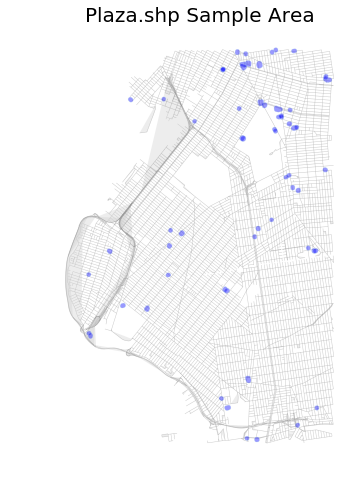

In [339]:
plaza,plaza_to_csv = merge_feature_buffer(feature_file = 'Plaza.shp',\
                                            df = segs,crs = '2263',sop_var_name = 'plazasq')



plaza.head()

In [340]:
plaza_to_csv.describe()

,plazasq,segid
count,5801.0,5801.000000
mean,1.0,50669.310464
std,0.0,27309.288418
min,1.0,184.000000
25%,1.0,25202.000000
50%,1.0,54252.000000
75%,1.0,75669.000000
max,1.0,91660.000000


In [341]:
plaza_to_csv.to_csv("joined_plazasq.csv",index=False,sep=',')

# Apply on other features - Greenstreet(Public Garden)

,PARK_NAME,SOURCE_ID,FEATURE_CO,SUB_FEATUR,LANDUSE,PARKNUM,STATUS,SYSTEM,geometry,index_right,...,RBlockFace,FIRST_Traf,MAX_Number,MAX_Numb_1,MAX_Numb_2,MAX_POSTED,FIRST_Bike,FIRST_Stre,MAX_Street,MIN_Street
0,GREENSTREET,2.149850e+10,4985,498500,None,BZ08,Unchanged,BZ08,"POLYGON ((988437.717334494 192733.0931863189, ...",35022.0,...,0212260077,A,3,1,4,25,None,FLATBUSH AVENUE EXTENSION,44.0,42.0
0,GREENSTREET,2.149850e+10,4985,498500,None,BZ08,Unchanged,BZ08,"POLYGON ((988437.717334494 192733.0931863189, ...",35035.0,...,0212260543,W,1,1,2,25,None,CATHEDRAL PLACE,18.0,18.0
0,GREENSTREET,2.149850e+10,4985,498500,None,BZ08,Unchanged,BZ08,"POLYGON ((988437.717334494 192733.0931863189, ...",35036.0,...,0212262092,W,3,1,4,25,None,FLATBUSH AVENUE EXTENSION,42.0,42.0
0,GREENSTREET,2.149850e+10,4985,498500,None,BZ08,Unchanged,BZ08,"POLYGON ((988437.717334494 192733.0931863189, ...",22289.0,...,0212260865,W,2,1,3,25,None,FLATBUSH AVENUE EXTENSION,32.0,32.0
0,GREENSTREET,2.149850e+10,4985,498500,None,BZ08,Unchanged,BZ08,"POLYGON ((988437.717334494 192733.0931863189, ...",58897.0,...,0212260594,A,4,1,5,25,None,FLATBUSH AVENUE EXTENSION,50.0,50.0


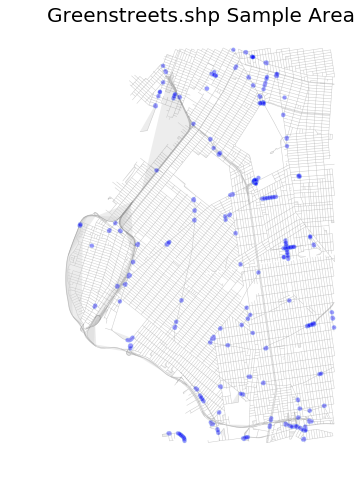

In [342]:
g,g_to_csv = merge_feature_buffer(feature_file = 'Greenstreets.shp',\
                                            df = segs,crs = '2263',sop_var_name = 'pubgardn')



g.head()

In [343]:
g_to_csv.describe()

,pubgardn,segid
count,15234.0,15234.000000
mean,1.0,45741.802613
std,0.0,26046.356866
min,1.0,47.000000
25%,1.0,22553.250000
50%,1.0,46526.500000
75%,1.0,67904.250000
max,1.0,91650.000000


In [344]:
g_to_csv.to_csv("joined_pubgardn.csv",index=False,sep=',')

# Apply on other features - abandoned buildings / lots

,SOURCE_ID,FEATURE_CO,SUB_FEATUR,NAME,STATUS,geometry,index_right,access,bridge,from,...,RBlockFace,FIRST_Traf,MAX_Number,MAX_Numb_1,MAX_Numb_2,MAX_POSTED,FIRST_Bike,FIRST_Stre,MAX_Street,MIN_Street
0,2.125200e+10,2520,252000,None,New,"POLYGON ((988543.9196181768 193399.1263181274,...",35022.0,None,None,1258875733,...,0212260077,A,3,1,4,25,None,FLATBUSH AVENUE EXTENSION,44.0,42.0
0,2.125200e+10,2520,252000,None,New,"POLYGON ((988543.9196181768 193399.1263181274,...",35035.0,None,None,42492524,...,0212260543,W,1,1,2,25,None,CATHEDRAL PLACE,18.0,18.0
0,2.125200e+10,2520,252000,None,New,"POLYGON ((988543.9196181768 193399.1263181274,...",23164.0,None,None,598043789,...,0212261785,A,1,2,3,25,None,DUFFIELD STREET,30.0,30.0
0,2.125200e+10,2520,252000,None,New,"POLYGON ((988543.9196181768 193399.1263181274,...",35036.0,None,None,2406325294,...,0212262092,W,3,1,4,25,None,FLATBUSH AVENUE EXTENSION,42.0,42.0
0,2.125200e+10,2520,252000,None,New,"POLYGON ((988543.9196181768 193399.1263181274,...",41435.0,None,None,42497734,...,0212261615,W,1,2,3,25,None,CHAPEL STREET,18.0,18.0


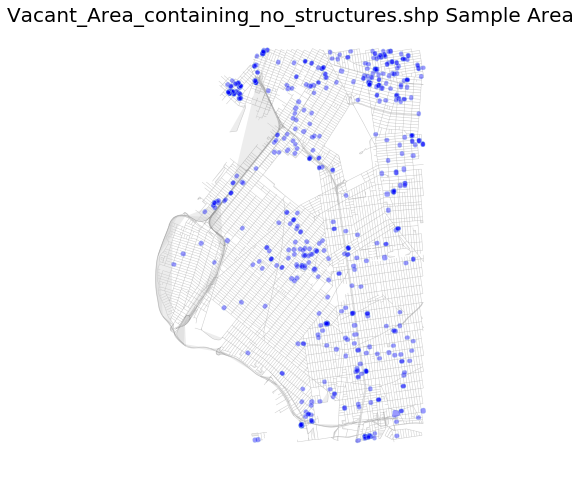

In [345]:
abandon,abandon_to_csv = merge_feature_buffer(feature_file = 'Vacant_Area_containing_no_structures.shp',\
                                            df = segs,crs = '2263',sop_var_name = 'abndbldg')



abandon.head()

In [346]:
abandon_to_csv.describe()

,abndbldg,segid
count,21275.0,21275.000000
mean,1.0,44372.215229
std,0.0,26587.499703
min,1.0,38.000000
25%,1.0,21452.500000
50%,1.0,42556.000000
75%,1.0,67748.000000
max,1.0,91658.000000


In [347]:
abandon_to_csv.to_csv("joined_abndbldg.csv",index=False,sep=',')

# Apply on other features - other recreational area

,SOURCE_ID,FEATURE_CO,SUB_FEATUR,NAME,STATUS,geometry,index_right,access,bridge,from,...,RBlockFace,FIRST_Traf,MAX_Number,MAX_Numb_1,MAX_Numb_2,MAX_POSTED,FIRST_Bike,FIRST_Stre,MAX_Street,MIN_Street
0,2.125000e+10,2510,251000,None,Updated,"POLYGON ((989555.2816394208 191114.6564644873,...",5338.0,None,None,42470439,...,1922602879,T,2,2,4,25,2,ASHLAND PLACE,54.0,54.0
0,2.125000e+10,2510,251000,None,Updated,"POLYGON ((989555.2816394208 191114.6564644873,...",5337.0,None,None,42470437,...,0212261337,A,1,2,3,25,None,WILLOUGHBY STREET,30.0,30.0
0,2.125000e+10,2510,251000,None,Updated,"POLYGON ((989555.2816394208 191114.6564644873,...",5339.0,None,None,42470437,...,1922611951,A,1,2,3,25,None,ST EDWARDS STREET,34.0,30.0
0,2.125000e+10,2510,251000,None,Updated,"POLYGON ((989555.2816394208 191114.6564644873,...",5331.0,None,None,42470437,...,1922611035,T,2,2,4,25,2,ASHLAND PLACE,55.0,54.0
2,2.125100e+10,2510,251000,None,Updated,"POLYGON ((988969.0772685393 194857.5632657198,...",46382.0,None,None,42521949,...,0212261565,A,2,1,3,25,None,GOLD STREET,28.0,28.0


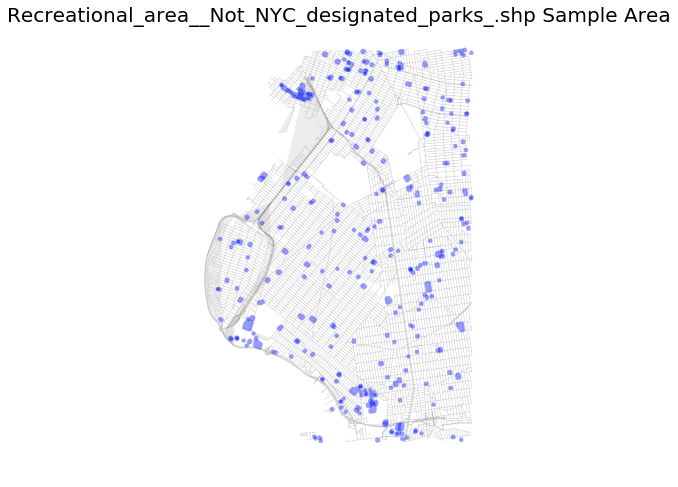

In [348]:
r,r_to_csv = merge_feature_buffer(feature_file = 'Recreational_area__Not_NYC_designated_parks_.shp',\
                                            df = segs,crs = '2263',sop_var_name = 'pbspothr')


r.head()

In [349]:
r_to_csv['pbspothr'].value_counts()

1    14965
Name: pbspothr, dtype: int64

In [351]:
r_to_csv.to_csv("joined_pbspothr.csv",index=False,sep=',')

In [350]:
r_to_csv.describe()

,pbspothr,segid
count,14965.0,14965.000000
mean,1.0,44867.262412
std,0.0,26482.740971
min,1.0,5.000000
25%,1.0,21909.000000
50%,1.0,43912.000000
75%,1.0,67990.000000
max,1.0,91642.000000


In [218]:
r_to_csv.to_csv("joined_pbspothr.csv",index=False,sep=',')

# Apply on other features - beach

,SOURCE_ID,FEATURE_CO,SUB_FEATUR,STATUS,geometry,index_right,access,bridge,from,highway,...,RBlockFace,FIRST_Traf,MAX_Number,MAX_Numb_1,MAX_Numb_2,MAX_POSTED,FIRST_Bike,FIRST_Stre,MAX_Street,MIN_Street
0,2.143000e+10,4300,430000,Updated,"POLYGON ((985072.5453808781 194857.5544855774,...",3383.0,None,None,3174844141,residential,...,0212261723,W,2,1,3,25,2,OLD FULTON STREET,30.0,28.0
0,2.143000e+10,4300,430000,Updated,"POLYGON ((985072.5453808781 194857.5544855774,...",27353.0,None,None,3174844147,secondary,...,0212261723,T,2,2,4,25,2,OLD FULTON STREET,66.0,58.0
0,2.143000e+10,4300,430000,Updated,"POLYGON ((985072.5453808781 194857.5544855774,...",3385.0,None,None,42469320,secondary,...,0212261723,T,2,2,4,25,2,OLD FULTON STREET,66.0,58.0
0,2.143000e+10,4300,430000,Updated,"POLYGON ((985072.5453808781 194857.5544855774,...",3384.0,None,None,42469325,residential,...,0212260072,A,2,2,4,25,None,WATER STREET,42.0,24.0
0,2.143000e+10,4300,430000,Updated,"POLYGON ((985072.5453808781 194857.5544855774,...",3394.0,None,None,214362644,residential,...,0212260072,A,2,2,4,25,None,WATER STREET,42.0,24.0


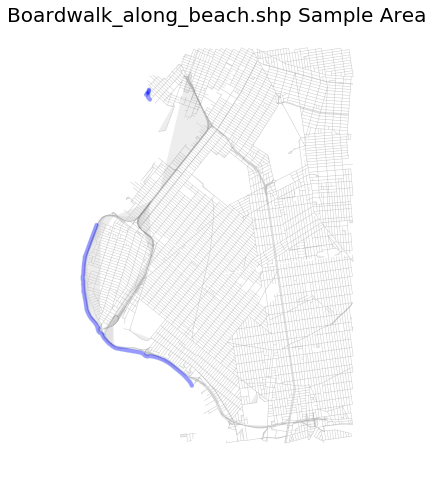

In [352]:
b,b_to_csv = merge_feature_buffer(feature_file = 'Boardwalk_along_beach.shp',\
                                            df = segs,crs = '2263',sop_var_name = 'beach')



b.head()

In [353]:
b_to_csv.describe()

,beach,segid
count,938.0,938.000000
mean,1.0,51113.066098
std,0.0,24571.535651
min,1.0,470.000000
25%,1.0,29303.250000
50%,1.0,57583.500000
75%,1.0,70638.500000
max,1.0,91479.000000


In [354]:
b_to_csv.to_csv("joined_beach.csv",index=False,sep=',')

,SOURCE_ID,FEATURE_CO,SUB_FEATUR,STATUS,geometry,centroid,segid
0,2.150000e+10,5000,500000,Unchanged,"POLYGON ((990044.4431236684 190843.5957248956,...",POINT (990029.3636842157 190739.7197202197),5339
1,2.150000e+10,5000,500000,Updated,"POLYGON ((989953.2139754146 191814.4684550613,...",POINT (989730.7282890398 191626.4517265979),5338
2,2.150000e+10,5000,500000,Unchanged,"POLYGON ((988897.051389575 195330.5549268126, ...",POINT (988847.3157554124 195306.7784605023),3452
3,2.150000e+10,5000,500000,Unchanged,"POLYGON ((989270.8839752525 195436.5458565652,...",POINT (989229.8061570526 195424.2433645794),3455
4,2.150000e+10,5000,500000,Unchanged,"POLYGON ((988145.6890471578 195152.533957392, ...",POINT (988214.4357064107 195019.9356224579),23148


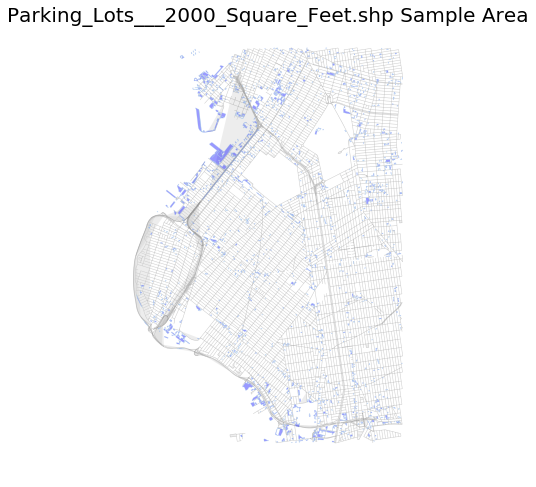

In [358]:
parkinglot, parkinglot_2000 = merge_feature(feature_file = 'Parking_Lots___2000_Square_Feet.shp',\
                                            df = segs,crs = '2263',sop_var_name = 'surfpkng')
parkinglot.head()

In [359]:
parkinglot['area'] = parkinglot['geometry'].area/1e3
parkinglot['area'].describe()

count    20714.000000
mean        18.235920
std         53.228173
min          1.157810
25%          4.537563
50%          7.663889
75%         14.900737
max       2687.128727
Name: area, dtype: float64

In [360]:
parkinglot_2000.head()

,surfpkng,segid
0,1,5
1,2,16
2,3,17
3,2,24
4,1,26


In [361]:
parkinglot_to_csv = parkinglot[['segid','area']].groupby('segid').mean().reset_index(level=0, drop=False)[['area','segid']]
    
#dt_to_csv.rename(columns = {'area':sop_var_name},inplace =True)

In [362]:
parkinglot_to_csv.head()

,area,segid
0,2.473414,5
1,5.782181,16
2,10.534842,17
3,4.151009,24
4,11.838975,26


In [363]:
parkinglot_to_csv.area.describe()

count    13006.000000
mean        16.410941
std         41.928176
min          1.283689
25%          4.780216
50%          7.835768
75%         14.655558
max       2687.128727
Name: area, dtype: float64

In [364]:
parkinglot_to_csv.shape

(13006, 2)

In [365]:
parkinglot_to_csv['sizeparkimi2'] = parkinglot_to_csv['area']
for i in range(parkinglot_to_csv.shape[0]):
    area = parkinglot_to_csv.loc[i, 'area']
    if area>=14.655558:
        parkinglot_to_csv.loc[i, 'sizeparkimi2'] = 4
    elif area>=7.835768:
        parkinglot_to_csv.loc[i, 'sizeparkimi2'] = 3
    elif area>=7.835768:
        parkinglot_to_csv.loc[i, 'sizeparkimi2'] = 2
    else:
        parkinglot_to_csv.loc[i, 'sizeparkimi2'] = 1
parkinglot_to_csv['sizeparkimi2'].describe()

count    13006.000000
mean         2.250038
std          1.299125
min          1.000000
25%          1.000000
50%          2.000000
75%          3.750000
max          4.000000
Name: sizeparkimi2, dtype: float64

In [366]:
parkinglot_to_csv = parkinglot_to_csv[['segid', 'sizeparkimi2']]
parkinglot_to_csv.head()

,segid,sizeparkimi2
0,5,1.0
1,16,1.0
2,17,3.0
3,24,1.0
4,26,3.0


In [367]:
parkinglot_to_csv.to_csv("joined_parkinglot_2000.csv",index=False,sep=',')